In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
pd.set_option('display.max_columns',None)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
dataset=train.copy()
dataset.drop('Id',axis=1,inplace=True)

In [4]:
datetime_period=[feature for feature in dataset if 'Yr' in feature or 'Year' in feature ]
numerical_variables=[feature for feature in dataset if dataset[feature].dtype!='O' and feature not in datetime_period]
categorical_variables=[feature for feature in dataset.columns if dataset[feature].dtype == 'O' and feature not in datetime_period]
categorical_variables.append('SalePrice')
datetime_period.append('SalePrice')

In [5]:
numerical_df=pd.DataFrame(train[numerical_variables])
datetime_df=pd.DataFrame(train[datetime_period])
categorical_df=pd.DataFrame(train[categorical_variables])

In [6]:
numerical_df.isnull().sum().sort_values(ascending=False)

LotFrontage      259
MasVnrArea         8
SalePrice          0
BsmtHalfBath       0
LotArea            0
OverallQual        0
OverallCond        0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
FullBath           0
MoSold             0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MSSubClass         0
dtype: int64

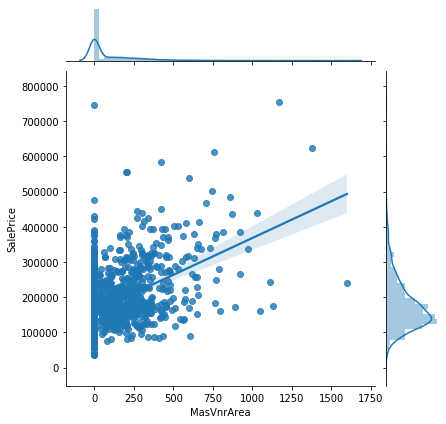

In [7]:
sns.jointplot(x='MasVnrArea',y='SalePrice',data=numerical_df,kind='reg')

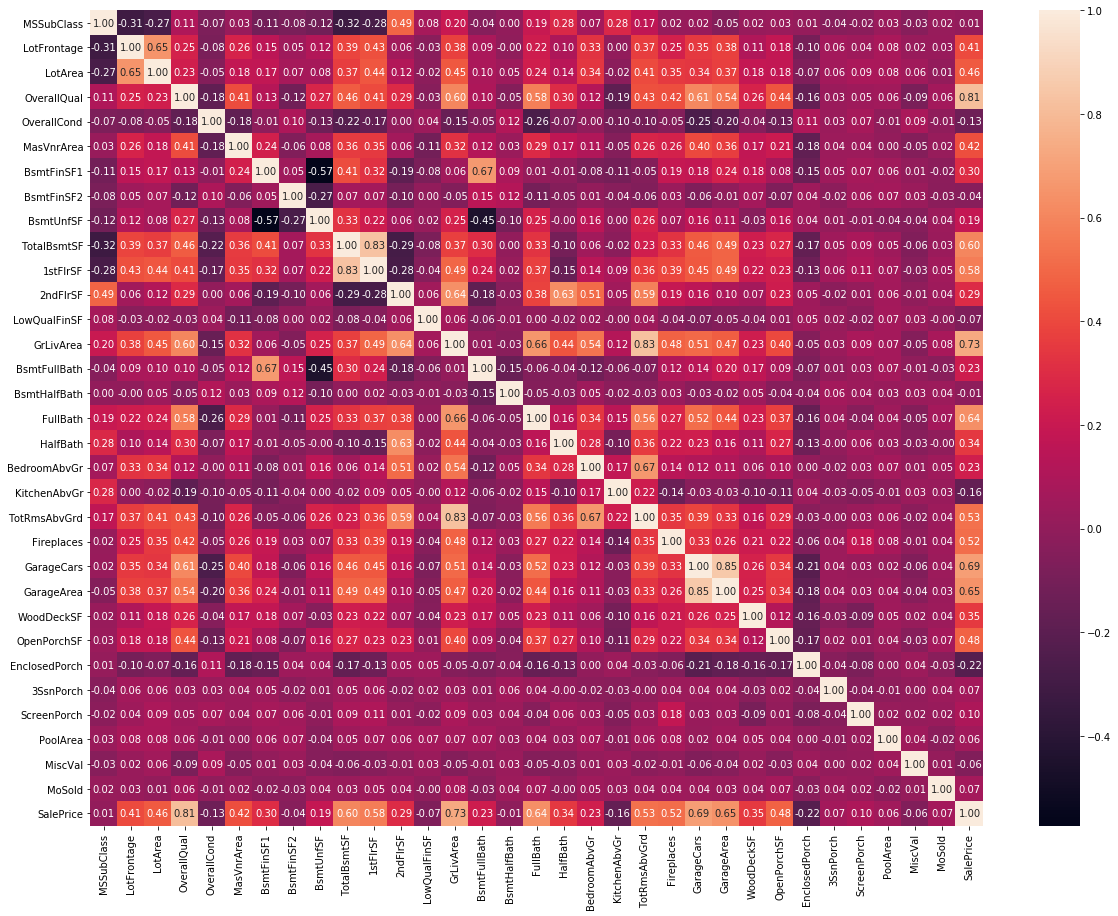

In [8]:
plt.figure(figsize=(20,15))
corr=numerical_df.corr(method='spearman')
sns.heatmap(data=corr,annot=True, fmt='0.2f')

# List of features correlated in numerical_df:
1.LotFrontage and LotArea --> LotArea

2.TotalBsmtSF and 1stFlrSF --> TotalBsmtSF

3.GarageCars and GarageArea --> GarageCars

4.TotRmsAbvGrd and GrLivArea --> GrLivArea

5.2ndFLrSF and HalfBath --> HalfBath

In [9]:
numerical_df.drop(['LotFrontage', '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', '2ndFlrSF'], axis=1, inplace=True)

In [10]:
numerical_df['MasVnrArea']=numerical_df['MasVnrArea'].fillna(103.68526170798899)

In [11]:
numerical_df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

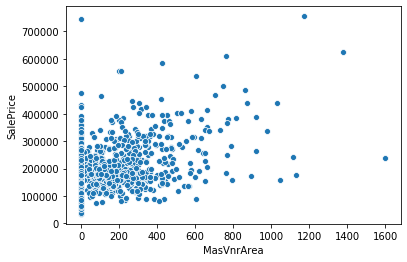

In [12]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=numerical_df)

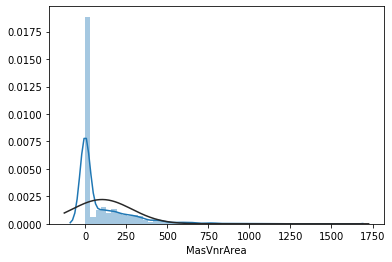

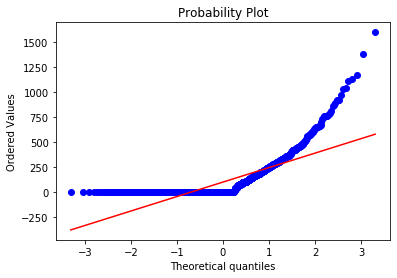

In [13]:
#histogram and normal probability plot
sns.distplot(numerical_df['MasVnrArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['MasVnrArea'], plot=plt)

In [14]:
numerical_df['LotArea']=np.log(numerical_df['LotArea'])

In [15]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
numerical_df['MVA'] = pd.Series(len(numerical_df['MasVnrArea']), index=numerical_df.index)
numerical_df['MVA'] = 0 
numerical_df.loc[numerical_df['MasVnrArea']>0,'MVA'] = 1

In [16]:
#transform data
numerical_df.loc[numerical_df['MVA']==1,'MasVnrArea'] = np.log(numerical_df['MasVnrArea'])

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


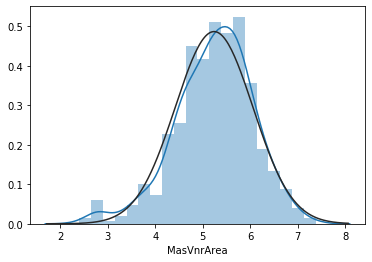

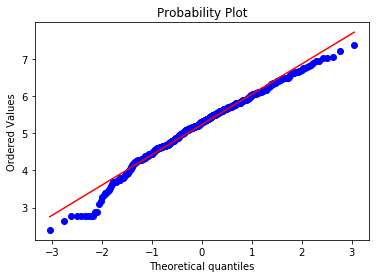

In [17]:
#histogram and normal probability plot
sns.distplot(numerical_df[numerical_df['MasVnrArea']>0]['MasVnrArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df[numerical_df['MasVnrArea']>0]['MasVnrArea'], plot=plt)

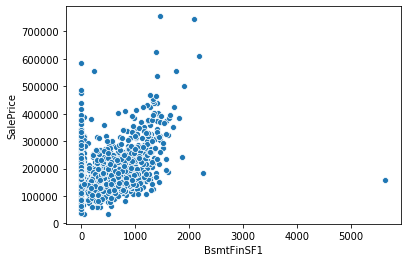

In [18]:
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=numerical_df)

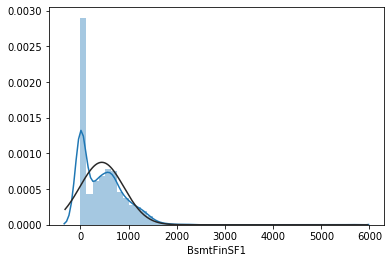

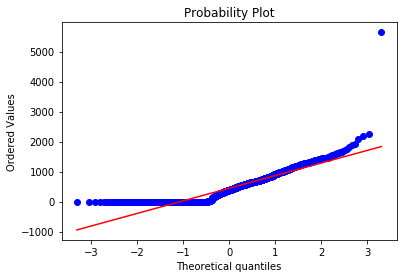

In [19]:
#histogram and normal probability plot
sns.distplot(numerical_df['BsmtFinSF1'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['BsmtFinSF1'], plot=plt)

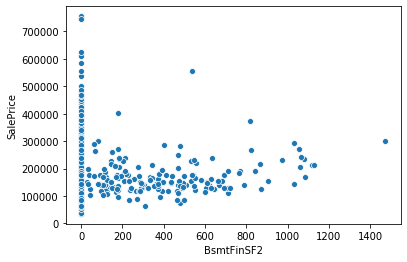

In [20]:
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=numerical_df)

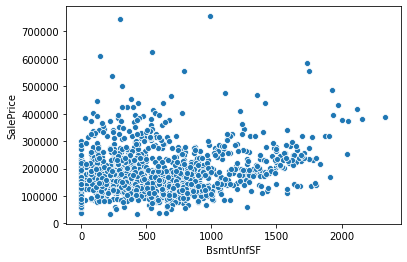

In [21]:
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=numerical_df)

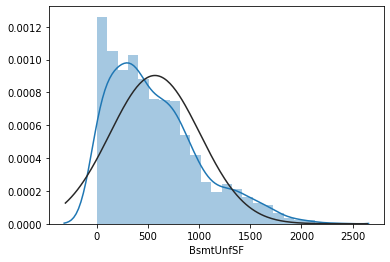

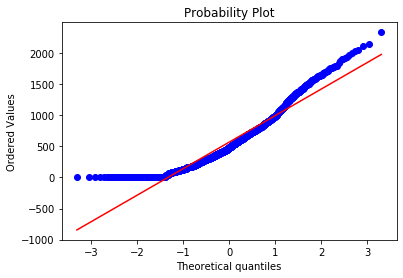

In [22]:
#histogram and normal probability plot
sns.distplot(numerical_df['BsmtUnfSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['BsmtUnfSF'], plot=plt)

In [23]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
numerical_df['BSF'] = pd.Series(len(numerical_df['BsmtUnfSF']), index=numerical_df.index)
numerical_df['BSF'] = 0 
numerical_df.loc[numerical_df['BsmtUnfSF']>0,'BSF'] = 1

In [24]:
#transform data
numerical_df.loc[numerical_df['BSF']==1,'BsmtUnfSF'] = np.log(numerical_df['BsmtUnfSF'])

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


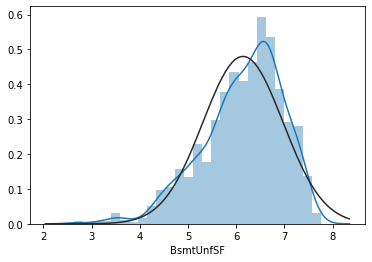

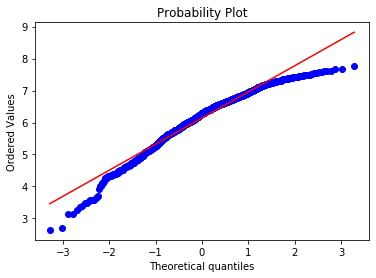

In [25]:
#histogram and normal probability plot
sns.distplot(numerical_df[numerical_df['BsmtUnfSF']>0]['BsmtUnfSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df[numerical_df['BsmtUnfSF']>0]['BsmtUnfSF'], plot=plt)

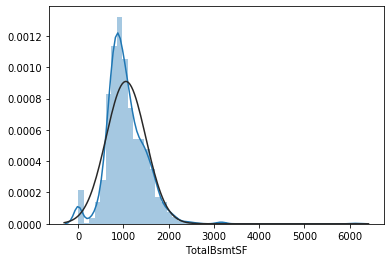

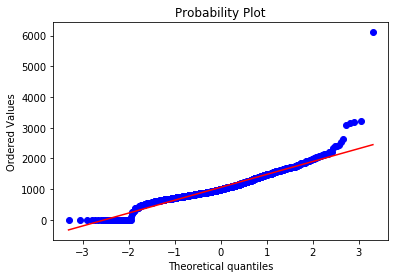

In [26]:
#histogram and normal probability plot
sns.distplot(numerical_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['TotalBsmtSF'], plot=plt)

In [27]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
numerical_df['HasBsmt'] = pd.Series(len(numerical_df['TotalBsmtSF']), index=numerical_df.index)
numerical_df['HasBsmt'] = 0 
numerical_df.loc[numerical_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [28]:
#transform data
numerical_df.loc[numerical_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(numerical_df['TotalBsmtSF'])

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


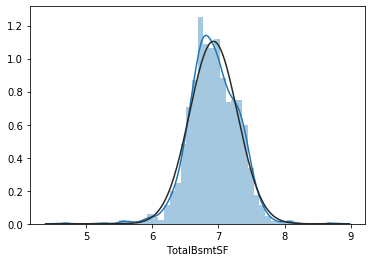

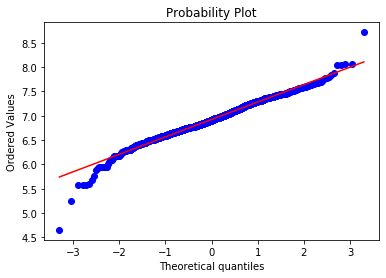

In [29]:
#histogram and normal probability plot
sns.distplot(numerical_df[numerical_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df[numerical_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

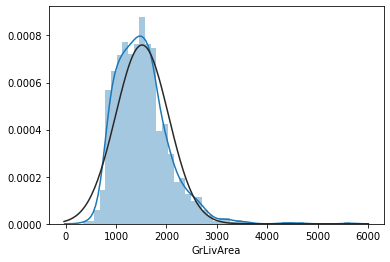

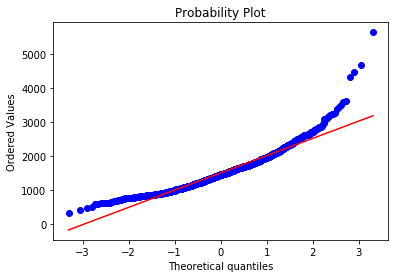

In [30]:
#histogram and normal probability plot
sns.distplot(numerical_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['GrLivArea'], plot=plt)

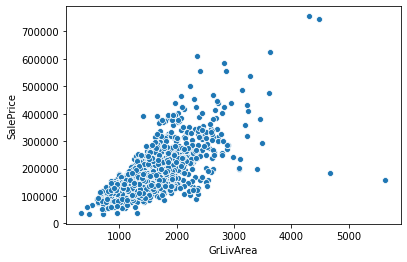

In [31]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=numerical_df)

In [32]:
numerical_df['GrLivArea']=np.log(numerical_df['GrLivArea'])

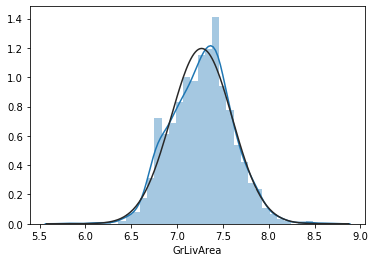

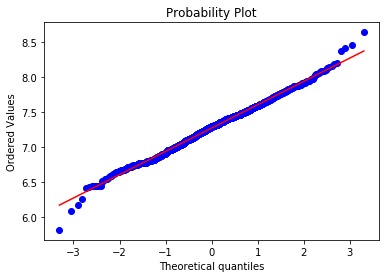

In [33]:
#histogram and normal probability plot
sns.distplot(numerical_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['GrLivArea'], plot=plt)

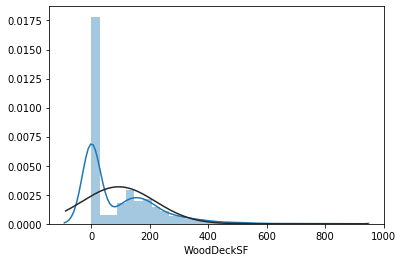

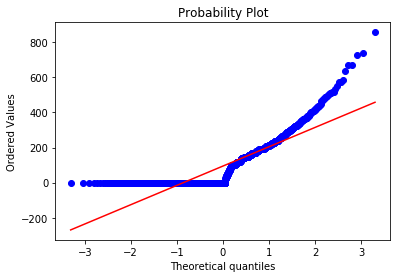

In [34]:
sns.distplot(numerical_df['WoodDeckSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['WoodDeckSF'], plot=plt)

In [35]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
numerical_df['WDF'] = pd.Series(len(numerical_df['WoodDeckSF']), index=numerical_df.index)
numerical_df['WDF'] = 0 
numerical_df.loc[numerical_df['WoodDeckSF']>0,'WDF'] = 1

In [36]:
#transform data
numerical_df.loc[numerical_df['WDF']==1,'WoodDeckSF'] = np.log(numerical_df['WoodDeckSF'])

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


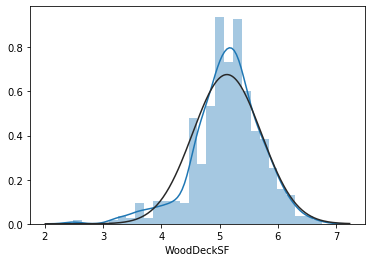

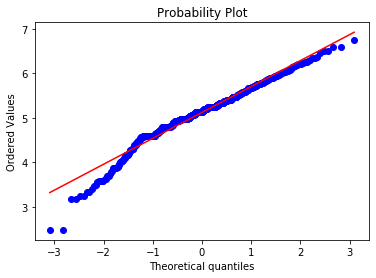

In [37]:
#histogram and normal probability plot
sns.distplot(numerical_df[numerical_df['WoodDeckSF']>0]['WoodDeckSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df[numerical_df['WoodDeckSF']>0]['WoodDeckSF'], plot=plt)

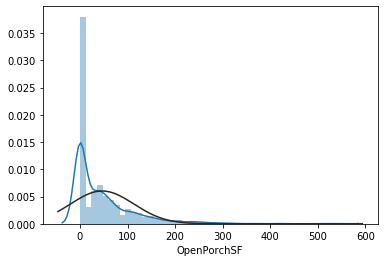

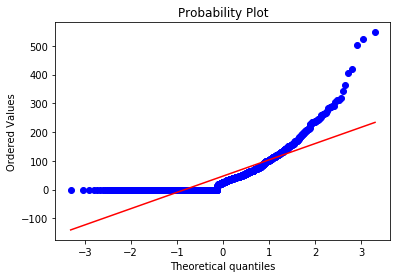

In [38]:
sns.distplot(numerical_df['OpenPorchSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df['OpenPorchSF'], plot=plt)

In [39]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
numerical_df['OPF'] = pd.Series(len(numerical_df['OpenPorchSF']), index=numerical_df.index)
numerical_df['OPF'] = 0 
numerical_df.loc[numerical_df['OpenPorchSF']>0,'OPF'] = 1

In [40]:
numerical_df.loc[numerical_df['OPF']==1,'OpenPorchSF'] = np.log(numerical_df['OpenPorchSF'])

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


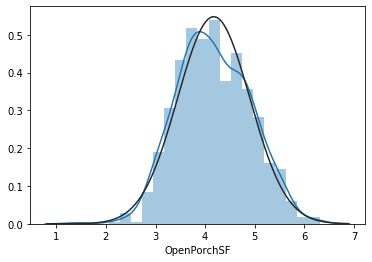

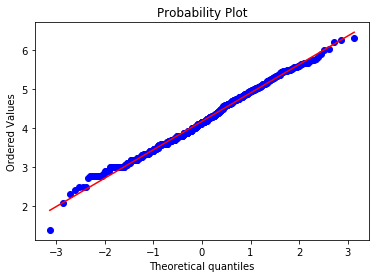

In [41]:
#histogram and normal probability plot
sns.distplot(numerical_df[numerical_df['OpenPorchSF']>0]['OpenPorchSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numerical_df[numerical_df['OpenPorchSF']>0]['OpenPorchSF'], plot=plt)

In [42]:
categorical_df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley'], axis=1,inplace=True)

In [43]:
categorical_df.isnull().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
SalePrice         0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
LandSlope         0
Neighborhood      0
RoofMatl          0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0
RoofStyle         0
Foundation        0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
SaleCondition     0
Heating           0
HeatingQC         0
CentralAir        0
KitchenQual       0
Functional        0
PavedDrive        0
SaleType          0
MSZoning          0
dtype: int64

In [44]:
categorical_df['GarageCond']=categorical_df['GarageCond'].fillna(categorical_df['GarageCond'].mode()[0])
categorical_df['GarageQual']=categorical_df['GarageQual'].fillna(categorical_df['GarageQual'].mode()[0])
categorical_df['GarageFinish']=categorical_df['GarageFinish'].fillna(categorical_df['GarageFinish'].mode()[0])
categorical_df['GarageType']=categorical_df['GarageType'].fillna(categorical_df['GarageType'].mode()[0])
categorical_df['BsmtExposure']=categorical_df['BsmtExposure'].fillna(categorical_df['BsmtExposure'].mode()[0])
categorical_df['BsmtFinType2']=categorical_df['BsmtFinType2'].fillna(categorical_df['BsmtFinType2'].mode()[0])
categorical_df['BsmtQual']=categorical_df['BsmtQual'].fillna(categorical_df['BsmtQual'].mode()[0])
categorical_df['BsmtCond']=categorical_df['BsmtCond'].fillna(categorical_df['BsmtCond'].mode()[0])
categorical_df['BsmtFinType1']=categorical_df['BsmtFinType1'].fillna(categorical_df['BsmtFinType1'].mode()[0])
categorical_df['Electrical']=categorical_df['Electrical'].fillna(categorical_df['Electrical'].mode()[0])
categorical_df['MasVnrType']=categorical_df['MasVnrType'].fillna(categorical_df['MasVnrType'].mode()[0])

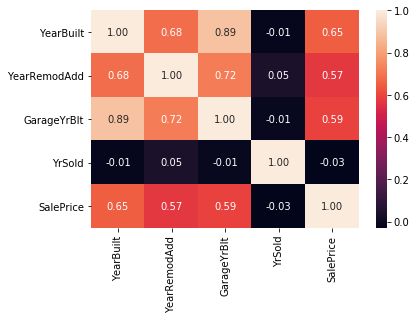

In [45]:
corr=datetime_df.corr(method='spearman')
sns.heatmap(data=corr,annot=True, fmt='0.2f')

In [46]:
datetime_df.isnull().sum().sort_values(ascending=False)

GarageYrBlt     81
SalePrice        0
YrSold           0
YearRemodAdd     0
YearBuilt        0
dtype: int64

In [47]:
datetime_df.drop('GarageYrBlt', axis=1,inplace=True)

# Applying Feature Engineering on Test Data

In [48]:
filenames=['train.csv','test.csv']
li = []

for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df= pd.concat(li, axis=0, ignore_index=True, sort=False)

In [49]:
df.drop('SalePrice',axis=1,inplace=True)

In [50]:
df.drop(['LotFrontage', '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', '2ndFlrSF','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley','GarageYrBlt'], axis=1, inplace=True)

In [51]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0])
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mode()[0])
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0])

In [52]:
df['MasVnrArea']=df['MasVnrArea'].fillna(round(103.68526170798899,2))

In [53]:
df['LotArea']=np.log(df['LotArea'])

In [54]:
df['MVA'] = pd.Series(len(df['MasVnrArea']), index=df.index)
df['MVA'] = 0 
df.loc[df['MasVnrArea']>0,'MVA'] = 1

In [55]:
df.loc[df['MVA']==1,'MasVnrArea'] = np.log(df['MasVnrArea'])

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
df['BSF'] = pd.Series(len(df['BsmtUnfSF']), index=df.index)
df['BSF'] = 0 
df.loc[df['BsmtUnfSF']>0,'BSF'] = 1

In [57]:
df.loc[df['BSF']==1,'BsmtUnfSF'] = np.log(df['BsmtUnfSF'])

In [58]:
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [59]:
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

In [60]:
df['GrLivArea']=np.log(df['GrLivArea'])

In [61]:
df['WDF'] = pd.Series(len(df['WoodDeckSF']), index=df.index)
df['WDF'] = 0 
df.loc[df['WoodDeckSF']>0,'WDF'] = 1

In [62]:
df.loc[df['WDF']==1,'WoodDeckSF'] = np.log(df['WoodDeckSF'])

In [63]:
df['OPF'] = pd.Series(len(df['OpenPorchSF']), index=df.index)
df['OPF'] = 0 
df.loc[df['OpenPorchSF']>0,'OPF'] = 1

In [64]:
df.loc[df['OPF']==1,'OpenPorchSF'] = np.log(df['OpenPorchSF'])

In [65]:
df.isnull().sum().sort_values(ascending=False)

OPF             0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenQual     0
Functional      0
Fireplaces      0
GarageType      0
Id              0
Length: 74, dtype: int64

In [66]:
categorical=[feature for feature in df.columns if df[feature].dtype == 'O']

In [67]:
df_final=pd.get_dummies(df[categorical],drop_first=True)

In [68]:
df.drop(df[categorical],axis=1,inplace=True)

In [69]:
print(df.shape)
print(df_final.shape)

(2919, 36)
(2919, 196)


In [70]:
df=pd.concat([df,df_final],axis=1)

In [71]:
df.drop(['MVA','BSF','HasBsmt','WDF','OPF'],axis=1,inplace=True)

# Feature Scaling and Selection

In [72]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [73]:
print("train:",train.shape,"test",test.shape)

train: (1460, 81) test (1459, 80)


In [74]:
X_train=df.iloc[:1460,:]

In [75]:
X_train=pd.concat([X_train,np.log(train['SalePrice'])],axis=1)

In [76]:
X_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,9.041922,7,5,2003,2003,5.278115,706.0,0.0,5.010635,6.752270,0,7.444249,1.0,0.0,2,1,3,1,0,2.0,0.000000,4.110874,0,0,0,0,0,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0

In [77]:
y_train=X_train['SalePrice']

In [78]:
X_train=X_train.drop(['Id','SalePrice'], axis=1)

In [79]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [80]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [81]:
selected_features=X_train.columns[feature_sel_model.get_support()]

In [82]:
df=df[selected_features]

In [83]:
scaler=StandardScaler()

In [84]:
df=pd.DataFrame(scaler.fit_transform(df),columns=selected_features)

In [85]:
X_train=df.iloc[:1460,:]
X_test=df.iloc[1460:,:]

In [86]:
print("train",X_train.shape)
print("test",X_test.shape)
print("length",len(selected_features))

train (1460, 30)
test (1459, 30)
length 30


# Prediction and Selecting Algorithm

In [87]:
import xgboost
regressor=xgboost.XGBRegressor()

In [88]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [89]:
# Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [90]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [91]:
# random_cv.fit(X_train,y_train)

In [92]:
# random_cv.best_estimator_

In [93]:
# regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0,
#              importance_type='gain', learning_rate=0.1, max_delta_step=0,
#              max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
#              n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#              silent=None, subsample=1, verbosity=1)

In [94]:
# regressor.fit(X_train,y_train)

In [95]:
# y_pred=regressor.predict(X_test)

In [96]:
# pred=pd.DataFrame(y_pred)

In [97]:
# submission=pd.concat([test['Id'],pred],axis=1)

In [98]:
# submission.columns=['Id','SalePrice']

In [99]:
# submission.to_csv("submission.csv",index=False)

In [100]:
# y_pred

In [106]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [115]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.layers import Flatten

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error,optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=50, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 2s 2ms/step - loss: 6.1440 - val_loss: 3.1037
Epoch 2/1000
1168/1168 [==============================] - 0s 327us/step - loss: 2.3167 - val_loss: 2.2145
Epoch 3/1000
1168/1168 [==============================] - 1s 506us/step - loss: 1.6305 - val_loss: 1.7784
Epoch 4/1000
1168/1168 [==============================] - 1s 487us/step - loss: 1.3042 - val_loss: 1.5238
Epoch 5/1000
1168/1168 [==============================] - 1s 497us/step - loss: 1.1066 - val_loss: 1.3136
Epoch 6/1000
1168/1168 [==============================] - 1s 506us/step - loss: 0.9612 - val_loss: 1.2179
Epoch 7/1000
1168/1168 [==============================] - 1s 518us/step - loss: 0.8694 - val_loss: 1.1047
Epoch 8/1000
1168/1168 [==============================] - 1s 499us/step - loss: 0.7876 - val_loss: 1.0331
Epoch 9/1000
1168/1168 [==============================] - 0s 335us/step - loss: 0.7135 - val_loss: 0.9713
E

1168/1168 [==============================] - 0s 428us/step - loss: 0.0965 - val_loss: 0.4250
Epoch 78/1000
1168/1168 [==============================] - 0s 263us/step - loss: 0.0939 - val_loss: 0.4219
Epoch 79/1000
1168/1168 [==============================] - 1s 459us/step - loss: 0.0961 - val_loss: 0.4288
Epoch 80/1000
1168/1168 [==============================] - 0s 406us/step - loss: 0.0903 - val_loss: 0.4296
Epoch 81/1000
1168/1168 [==============================] - 1s 458us/step - loss: 0.0958 - val_loss: 0.4239
Epoch 82/1000
1168/1168 [==============================] - 1s 452us/step - loss: 0.0959 - val_loss: 0.4371
Epoch 83/1000
1168/1168 [==============================] - 1s 435us/step - loss: 0.0862 - val_loss: 0.4175
Epoch 84/1000
1168/1168 [==============================] - 0s 319us/step - loss: 0.0871 - val_loss: 0.4229
Epoch 85/1000
1168/1168 [==============================] - 0s 278us/step - loss: 0.0944 - val_loss: 0.4226
Epoch 86/1000
1168/1168 [==========================

1168/1168 [==============================] - 0s 300us/step - loss: 0.0619 - val_loss: 0.3774
Epoch 154/1000
1168/1168 [==============================] - 0s 276us/step - loss: 0.0687 - val_loss: 0.3832
Epoch 155/1000
1168/1168 [==============================] - 0s 319us/step - loss: 0.0685 - val_loss: 0.3850
Epoch 156/1000
1168/1168 [==============================] - 0s 385us/step - loss: 0.0641 - val_loss: 0.3812
Epoch 157/1000
1168/1168 [==============================] - 0s 267us/step - loss: 0.0665 - val_loss: 0.3930
Epoch 158/1000
1168/1168 [==============================] - 0s 267us/step - loss: 0.0718 - val_loss: 0.3833
Epoch 159/1000
1168/1168 [==============================] - 0s 253us/step - loss: 0.0684 - val_loss: 0.3810
Epoch 160/1000
1168/1168 [==============================] - 0s 326us/step - loss: 0.0679 - val_loss: 0.3832
Epoch 161/1000
1168/1168 [==============================] - 1s 490us/step - loss: 0.0730 - val_loss: 0.3881
Epoch 162/1000
1168/1168 [=================

Epoch 229/1000
1168/1168 [==============================] - 0s 269us/step - loss: 0.0575 - val_loss: 0.3561
Epoch 230/1000
1168/1168 [==============================] - 0s 321us/step - loss: 0.0608 - val_loss: 0.3605
Epoch 231/1000
1168/1168 [==============================] - 0s 275us/step - loss: 0.0557 - val_loss: 0.3557
Epoch 232/1000
1168/1168 [==============================] - 0s 291us/step - loss: 0.0588 - val_loss: 0.3519
Epoch 233/1000
1168/1168 [==============================] - 1s 567us/step - loss: 0.0577 - val_loss: 0.3526
Epoch 234/1000
1168/1168 [==============================] - 1s 510us/step - loss: 0.0652 - val_loss: 0.3521
Epoch 235/1000
1168/1168 [==============================] - 0s 319us/step - loss: 0.0578 - val_loss: 0.3574
Epoch 236/1000
1168/1168 [==============================] - 0s 293us/step - loss: 0.0740 - val_loss: 0.3524
Epoch 237/1000
1168/1168 [==============================] - 1s 543us/step - loss: 0.0609 - val_loss: 0.3485
Epoch 238/1000
1168/1168 [==

Epoch 305/1000
1168/1168 [==============================] - 0s 300us/step - loss: 0.0634 - val_loss: 0.3254
Epoch 306/1000
1168/1168 [==============================] - 0s 395us/step - loss: 0.0624 - val_loss: 0.3265
Epoch 307/1000
1168/1168 [==============================] - 0s 318us/step - loss: 0.0597 - val_loss: 0.3342
Epoch 308/1000
1168/1168 [==============================] - 0s 350us/step - loss: 0.0540 - val_loss: 0.3307
Epoch 309/1000
1168/1168 [==============================] - 0s 349us/step - loss: 0.0568 - val_loss: 0.3266
Epoch 310/1000
1168/1168 [==============================] - 0s 292us/step - loss: 0.0538 - val_loss: 0.3265
Epoch 311/1000
1168/1168 [==============================] - 0s 281us/step - loss: 0.0502 - val_loss: 0.3264
Epoch 312/1000
1168/1168 [==============================] - 0s 310us/step - loss: 0.0532 - val_loss: 0.3205
Epoch 313/1000
1168/1168 [==============================] - 0s 295us/step - loss: 0.0568 - val_loss: 0.3238
Epoch 314/1000
1168/1168 [==

1168/1168 [==============================] - 0s 315us/step - loss: 0.0551 - val_loss: 0.3154
Epoch 381/1000
1168/1168 [==============================] - 1s 580us/step - loss: 0.0562 - val_loss: 0.3084
Epoch 382/1000
1168/1168 [==============================] - 1s 552us/step - loss: 0.0563 - val_loss: 0.3081
Epoch 383/1000
1168/1168 [==============================] - 1s 535us/step - loss: 0.0559 - val_loss: 0.3007
Epoch 384/1000
1168/1168 [==============================] - 1s 499us/step - loss: 0.0586 - val_loss: 0.3042
Epoch 385/1000
1168/1168 [==============================] - 1s 456us/step - loss: 0.0507 - val_loss: 0.3076
Epoch 386/1000
1168/1168 [==============================] - 0s 267us/step - loss: 0.0509 - val_loss: 0.3170
Epoch 387/1000
1168/1168 [==============================] - 0s 270us/step - loss: 0.0505 - val_loss: 0.3035
Epoch 388/1000
1168/1168 [==============================] - 0s 295us/step - loss: 0.0472 - val_loss: 0.2988
Epoch 389/1000
1168/1168 [=================

Epoch 456/1000
1168/1168 [==============================] - 1s 435us/step - loss: 0.0480 - val_loss: 0.2851
Epoch 457/1000
1168/1168 [==============================] - 1s 474us/step - loss: 0.0535 - val_loss: 0.2798
Epoch 458/1000
1168/1168 [==============================] - 1s 446us/step - loss: 0.0524 - val_loss: 0.2865
Epoch 459/1000
1168/1168 [==============================] - 1s 469us/step - loss: 0.0557 - val_loss: 0.2800
Epoch 460/1000
1168/1168 [==============================] - 0s 379us/step - loss: 0.0590 - val_loss: 0.2830
Epoch 461/1000
1168/1168 [==============================] - 1s 441us/step - loss: 0.0492 - val_loss: 0.2880
Epoch 462/1000
1168/1168 [==============================] - 1s 437us/step - loss: 0.0573 - val_loss: 0.2796
Epoch 463/1000
1168/1168 [==============================] - 1s 464us/step - loss: 0.0519 - val_loss: 0.2856
Epoch 464/1000
1168/1168 [==============================] - 1s 462us/step - loss: 0.0504 - val_loss: 0.2769
Epoch 465/1000
1168/1168 [==

Epoch 532/1000
1168/1168 [==============================] - 0s 387us/step - loss: 0.0508 - val_loss: 0.2663
Epoch 533/1000
1168/1168 [==============================] - 1s 501us/step - loss: 0.0489 - val_loss: 0.2672
Epoch 534/1000
1168/1168 [==============================] - 1s 465us/step - loss: 0.0457 - val_loss: 0.2684
Epoch 535/1000
1168/1168 [==============================] - 1s 485us/step - loss: 0.0498 - val_loss: 0.2675
Epoch 536/1000
1168/1168 [==============================] - 0s 334us/step - loss: 0.0479 - val_loss: 0.2662
Epoch 537/1000
1168/1168 [==============================] - 0s 277us/step - loss: 0.0453 - val_loss: 0.2697
Epoch 538/1000
1168/1168 [==============================] - 0s 311us/step - loss: 0.0452 - val_loss: 0.2666
Epoch 539/1000
1168/1168 [==============================] - 0s 285us/step - loss: 0.0476 - val_loss: 0.2608
Epoch 540/1000
1168/1168 [==============================] - 0s 259us/step - loss: 0.0450 - val_loss: 0.2672
Epoch 541/1000
1168/1168 [==

1168/1168 [==============================] - 0s 362us/step - loss: 0.0439 - val_loss: 0.2523
Epoch 608/1000
1168/1168 [==============================] - 0s 278us/step - loss: 0.0418 - val_loss: 0.2521
Epoch 609/1000
1168/1168 [==============================] - 0s 299us/step - loss: 0.0431 - val_loss: 0.2549
Epoch 610/1000
1168/1168 [==============================] - 1s 504us/step - loss: 0.0455 - val_loss: 0.2521
Epoch 611/1000
1168/1168 [==============================] - 0s 263us/step - loss: 0.0459 - val_loss: 0.2592
Epoch 612/1000
1168/1168 [==============================] - 0s 263us/step - loss: 0.0470 - val_loss: 0.2508
Epoch 613/1000
1168/1168 [==============================] - 0s 256us/step - loss: 0.0389 - val_loss: 0.2473
Epoch 614/1000
1168/1168 [==============================] - 0s 276us/step - loss: 0.0420 - val_loss: 0.2540
Epoch 615/1000
1168/1168 [==============================] - 1s 473us/step - loss: 0.0432 - val_loss: 0.2551
Epoch 616/1000
1168/1168 [=================

Epoch 683/1000
1168/1168 [==============================] - 0s 260us/step - loss: 0.0391 - val_loss: 0.2367
Epoch 684/1000
1168/1168 [==============================] - 0s 360us/step - loss: 0.0410 - val_loss: 0.2455
Epoch 685/1000
1168/1168 [==============================] - 1s 494us/step - loss: 0.0394 - val_loss: 0.2348
Epoch 686/1000
1168/1168 [==============================] - 0s 371us/step - loss: 0.0407 - val_loss: 0.2382
Epoch 687/1000
1168/1168 [==============================] - 1s 446us/step - loss: 0.0425 - val_loss: 0.2408
Epoch 688/1000
1168/1168 [==============================] - 1s 433us/step - loss: 0.0475 - val_loss: 0.2358
Epoch 689/1000
1168/1168 [==============================] - 1s 475us/step - loss: 0.0387 - val_loss: 0.2418
Epoch 690/1000
1168/1168 [==============================] - 1s 526us/step - loss: 0.0397 - val_loss: 0.2366
Epoch 691/1000
1168/1168 [==============================] - 1s 529us/step - loss: 0.0352 - val_loss: 0.2462
Epoch 692/1000
1168/1168 [==

Epoch 759/1000
1168/1168 [==============================] - 1s 504us/step - loss: 0.0472 - val_loss: 0.2264
Epoch 760/1000
1168/1168 [==============================] - 0s 426us/step - loss: 0.0358 - val_loss: 0.2308
Epoch 761/1000
1168/1168 [==============================] - 1s 511us/step - loss: 0.0370 - val_loss: 0.2301
Epoch 762/1000
1168/1168 [==============================] - 1s 541us/step - loss: 0.0402 - val_loss: 0.2304
Epoch 763/1000
1168/1168 [==============================] - 1s 631us/step - loss: 0.0396 - val_loss: 0.2281
Epoch 764/1000
1168/1168 [==============================] - 0s 406us/step - loss: 0.0486 - val_loss: 0.2242
Epoch 765/1000
1168/1168 [==============================] - 1s 460us/step - loss: 0.0405 - val_loss: 0.2295
Epoch 766/1000
1168/1168 [==============================] - 1s 482us/step - loss: 0.0464 - val_loss: 0.2315
Epoch 767/1000
1168/1168 [==============================] - 1s 581us/step - loss: 0.0404 - val_loss: 0.2292
Epoch 768/1000
1168/1168 [==

Epoch 835/1000
1168/1168 [==============================] - 0s 289us/step - loss: 0.0449 - val_loss: 0.2173
Epoch 836/1000
1168/1168 [==============================] - 0s 284us/step - loss: 0.0413 - val_loss: 0.2158
Epoch 837/1000
1168/1168 [==============================] - 0s 379us/step - loss: 0.0356 - val_loss: 0.2208
Epoch 838/1000
1168/1168 [==============================] - 0s 281us/step - loss: 0.0402 - val_loss: 0.2173
Epoch 839/1000
1168/1168 [==============================] - 0s 280us/step - loss: 0.0372 - val_loss: 0.2202
Epoch 840/1000
1168/1168 [==============================] - 1s 434us/step - loss: 0.0421 - val_loss: 0.2198
Epoch 841/1000
1168/1168 [==============================] - 0s 267us/step - loss: 0.0392 - val_loss: 0.2211
Epoch 842/1000
1168/1168 [==============================] - 0s 269us/step - loss: 0.0436 - val_loss: 0.2157
Epoch 843/1000
1168/1168 [==============================] - 0s 278us/step - loss: 0.0409 - val_loss: 0.2220
Epoch 844/1000
1168/1168 [==

Epoch 911/1000
1168/1168 [==============================] - 0s 262us/step - loss: 0.0399 - val_loss: 0.2176
Epoch 912/1000
1168/1168 [==============================] - 1s 532us/step - loss: 0.0372 - val_loss: 0.2190
Epoch 913/1000
1168/1168 [==============================] - 1s 547us/step - loss: 0.0412 - val_loss: 0.2161
Epoch 914/1000
1168/1168 [==============================] - 1s 538us/step - loss: 0.0377 - val_loss: 0.2113
Epoch 915/1000
1168/1168 [==============================] - 1s 456us/step - loss: 0.0369 - val_loss: 0.2130
Epoch 916/1000
1168/1168 [==============================] - 1s 490us/step - loss: 0.0379 - val_loss: 0.2132
Epoch 917/1000
1168/1168 [==============================] - 1s 479us/step - loss: 0.0378 - val_loss: 0.2147
Epoch 918/1000
1168/1168 [==============================] - 1s 445us/step - loss: 0.0358 - val_loss: 0.2142
Epoch 919/1000
1168/1168 [==============================] - 1s 447us/step - loss: 0.0340 - val_loss: 0.2150
Epoch 920/1000
1168/1168 [==

Epoch 987/1000
1168/1168 [==============================] - 1s 461us/step - loss: 0.0334 - val_loss: 0.2094
Epoch 988/1000
1168/1168 [==============================] - 1s 464us/step - loss: 0.0359 - val_loss: 0.2078
Epoch 989/1000
1168/1168 [==============================] - 1s 436us/step - loss: 0.0353 - val_loss: 0.2047
Epoch 990/1000
1168/1168 [==============================] - 0s 428us/step - loss: 0.0346 - val_loss: 0.2064
Epoch 991/1000
1168/1168 [==============================] - 1s 447us/step - loss: 0.0335 - val_loss: 0.2115
Epoch 992/1000
1168/1168 [==============================] - 1s 446us/step - loss: 0.0377 - val_loss: 0.2093
Epoch 993/1000
1168/1168 [==============================] - 1s 447us/step - loss: 0.0345 - val_loss: 0.2115
Epoch 994/1000
1168/1168 [==============================] - 1s 452us/step - loss: 0.0383 - val_loss: 0.2098
Epoch 995/1000
1168/1168 [==============================] - 0s 415us/step - loss: 0.0345 - val_loss: 0.2085
Epoch 996/1000
1168/1168 [==

In [124]:
ann_pred=classifier.predict(X_test.values)

In [125]:
y_pred=pd.DataFrame(ann_pred)

In [128]:
submission=pd.concat([test['Id'],y_pred],axis=1)

In [129]:
submission.columns=['Id','SalePrice']

In [130]:
submission.to_csv("submission.csv",index=False)